<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Normalization-of-values" data-toc-modified-id="Normalization-of-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Normalization of values</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Neural-network" data-toc-modified-id="Neural-network-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Neural network</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#False-false-class" data-toc-modified-id="False-false-class-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>False false class</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import pydicom
from sklearn.metrics import roc_auc_score
from copy import deepcopy
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Data Preprocessing

In [2]:
ts = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/datasets/TrueSet.csv')
#display(ts)

,Patient_id,Slice_id,Angles_Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,status,Entropy
0,1.0,1.0,0 (d = 1),33.624173,0.254810,0.991273,0.976641,0.988252,0.971235,1.0,0.133671
1,1.0,1.0,45 (d = 1),52.397355,0.335625,0.991312,0.976185,0.988021,0.955348,1.0,0.133671
2,1.0,1.0,90 (d = 1),32.395772,0.246661,0.991358,0.976671,0.988267,0.972286,1.0,0.133671
3,1.0,1.0,135 (d = 1),57.237616,0.354848,0.991172,0.976124,0.987990,0.951223,1.0,0.133671
4,1.0,1.0,0 (d = 2),84.013533,0.476040,0.990650,0.975607,0.987728,0.928407,1.0,0.133671
...,...,...,...,...,...,...,...,...,...,...,...
1315,4.0,58.0,135 (d = 2),74.172211,0.996355,0.979663,0.958999,0.979285,0.663702,1.0,0.279801
1316,4.0,58.0,0 (d = 3),82.000896,1.083436,0.978642,0.956995,0.978261,0.629656,1.0,0.279801
1317,4.0,58.0,45 (d = 3),78.950834,1.052204,0.978875,0.957253,0.978393,0.644799,1.0,0.279801
1318,4.0,58.0,90 (d = 3),83.111228,1.067657,0.978810,0.957206,0.978369,0.624641,1.0,0.279801


In [3]:
ts.drop(columns = ['Patient_id', 'Slice_id', 'Angles_Distance', 'ASM'], inplace = True)
#display(ts)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,status,Entropy
0,33.624173,0.254810,0.991273,0.988252,0.971235,1.0,0.133671
1,52.397355,0.335625,0.991312,0.988021,0.955348,1.0,0.133671
2,32.395772,0.246661,0.991358,0.988267,0.972286,1.0,0.133671
3,57.237616,0.354848,0.991172,0.987990,0.951223,1.0,0.133671
4,84.013533,0.476040,0.990650,0.987728,0.928407,1.0,0.133671
...,...,...,...,...,...,...,...
1315,74.172211,0.996355,0.979663,0.979285,0.663702,1.0,0.279801
1316,82.000896,1.083436,0.978642,0.978261,0.629656,1.0,0.279801
1317,78.950834,1.052204,0.978875,0.978393,0.644799,1.0,0.279801
1318,83.111228,1.067657,0.978810,0.978369,0.624641,1.0,0.279801


In [4]:
tts = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/datasets/TrueTrueSet.csv')
#display(tts)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,status,Entropy
0,1.0,1.0,0.0,1.0,4064.928018,37.291161,0.230484,0.041462,0.203623,0.547081,1.0,6.711178
1,1.0,1.0,45.0,1.0,4440.675110,39.541330,0.230108,0.039953,0.199882,0.506535,1.0,6.711178
2,1.0,1.0,90.0,1.0,4335.002512,39.222794,0.232505,0.041465,0.203630,0.516879,1.0,6.711178
3,1.0,1.0,135.0,1.0,4424.382514,39.475755,0.229090,0.039934,0.199836,0.508345,1.0,6.711178
4,1.0,1.0,0.0,2.0,4347.037755,38.815591,0.228018,0.039246,0.198105,0.516992,1.0,6.711178
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,4.0,58.0,135.0,2.0,4306.086736,40.169719,0.223799,0.039942,0.199855,0.386690,1.0,6.728915
1316,4.0,58.0,0.0,3.0,4531.744395,41.587373,0.216778,0.037082,0.192568,0.356141,1.0,6.728915
1317,4.0,58.0,45.0,3.0,4853.396863,43.779125,0.213272,0.036377,0.190728,0.312494,1.0,6.728915
1318,4.0,58.0,90.0,3.0,4893.647002,44.080086,0.214821,0.037164,0.192779,0.304897,1.0,6.728915


In [5]:
tts.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
#display(tts)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,status,Entropy
0,4064.928018,37.291161,0.230484,0.203623,0.547081,1.0,6.711178
1,4440.675110,39.541330,0.230108,0.199882,0.506535,1.0,6.711178
2,4335.002512,39.222794,0.232505,0.203630,0.516879,1.0,6.711178
3,4424.382514,39.475755,0.229090,0.199836,0.508345,1.0,6.711178
4,4347.037755,38.815591,0.228018,0.198105,0.516992,1.0,6.711178
...,...,...,...,...,...,...,...
1315,4306.086736,40.169719,0.223799,0.199855,0.386690,1.0,6.728915
1316,4531.744395,41.587373,0.216778,0.192568,0.356141,1.0,6.728915
1317,4853.396863,43.779125,0.213272,0.190728,0.312494,1.0,6.728915
1318,4893.647002,44.080086,0.214821,0.192779,0.304897,1.0,6.728915


In [6]:
fs = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/datasets/FalseSet.csv')
#display(fs)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,status,Entropy
0,1.0,1.0,0.0,1.0,1415.114936,24.947779,0.241535,0.045526,0.213367,0.741286,0.0,6.626737
1,1.0,1.0,45.0,1.0,1564.000000,25.687628,0.241530,0.043876,0.209466,0.714698,0.0,6.626737
2,1.0,1.0,90.0,1.0,1532.402987,25.478171,0.244650,0.045569,0.213469,0.719792,0.0,6.626737
3,1.0,1.0,135.0,1.0,1541.695932,25.508743,0.240647,0.043870,0.209452,0.718767,0.0,6.626737
4,1.0,1.0,0.0,2.0,1542.802688,25.569513,0.239216,0.043007,0.207381,0.718585,0.0,6.626737
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,4.0,58.0,135.0,2.0,1834.651211,28.511326,0.242041,0.047174,0.217197,0.557800,0.0,6.558195
1316,4.0,58.0,0.0,3.0,1952.030385,29.420547,0.234079,0.043689,0.209020,0.530348,0.0,6.558195
1317,4.0,58.0,45.0,3.0,2134.257673,30.954337,0.230794,0.043073,0.207540,0.487669,0.0,6.558195
1318,4.0,58.0,90.0,3.0,2128.131485,30.897048,0.232787,0.043805,0.209296,0.488054,0.0,6.558195


In [7]:
fs.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
#display(fs)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,status,Entropy
0,1415.114936,24.947779,0.241535,0.213367,0.741286,0.0,6.626737
1,1564.000000,25.687628,0.241530,0.209466,0.714698,0.0,6.626737
2,1532.402987,25.478171,0.244650,0.213469,0.719792,0.0,6.626737
3,1541.695932,25.508743,0.240647,0.209452,0.718767,0.0,6.626737
4,1542.802688,25.569513,0.239216,0.207381,0.718585,0.0,6.626737
...,...,...,...,...,...,...,...
1315,1834.651211,28.511326,0.242041,0.217197,0.557800,0.0,6.558195
1316,1952.030385,29.420547,0.234079,0.209020,0.530348,0.0,6.558195
1317,2134.257673,30.954337,0.230794,0.207540,0.487669,0.0,6.558195
1318,2128.131485,30.897048,0.232787,0.209296,0.488054,0.0,6.558195


In [8]:
ffs = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/datasets/FalseFalseSet.csv')
#display(ffs)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,status,Entropy
0,1.0,1.0,0.0,1.0,1487.686275,13.585815,0.353834,0.043022,0.207417,0.743113,0.0,5.639273
1,1.0,1.0,45.0,1.0,1803.507820,16.709327,0.334732,0.041388,0.203441,0.689746,0.0,5.639273
2,1.0,1.0,90.0,1.0,1690.679504,15.470895,0.360299,0.043114,0.207640,0.708052,0.0,5.639273
3,1.0,1.0,135.0,1.0,1819.934917,16.615609,0.336151,0.041380,0.203421,0.686921,0.0,5.639273
4,1.0,1.0,0.0,2.0,1810.637226,16.508658,0.338136,0.040618,0.201540,0.688505,0.0,5.639273
...,...,...,...,...,...,...,...,...,...,...,...,...
391,4.0,14.0,135.0,2.0,3148.123706,27.531995,0.269034,0.039956,0.199891,0.575695,0.0,6.745025
392,4.0,14.0,0.0,3.0,3600.945312,31.245368,0.257491,0.037084,0.192571,0.515679,0.0,6.745025
393,4.0,14.0,45.0,3.0,4001.138400,34.395948,0.247689,0.036361,0.190687,0.463251,0.0,6.745025
394,4.0,14.0,90.0,3.0,4217.862648,35.971375,0.245831,0.037136,0.192707,0.432895,0.0,6.745025


In [9]:
ffs.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
#display(ffs)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,status,Entropy
0,1487.686275,13.585815,0.353834,0.207417,0.743113,0.0,5.639273
1,1803.507820,16.709327,0.334732,0.203441,0.689746,0.0,5.639273
2,1690.679504,15.470895,0.360299,0.207640,0.708052,0.0,5.639273
3,1819.934917,16.615609,0.336151,0.203421,0.686921,0.0,5.639273
4,1810.637226,16.508658,0.338136,0.201540,0.688505,0.0,5.639273
...,...,...,...,...,...,...,...
391,3148.123706,27.531995,0.269034,0.199891,0.575695,0.0,6.745025
392,3600.945312,31.245368,0.257491,0.192571,0.515679,0.0,6.745025
393,4001.138400,34.395948,0.247689,0.190687,0.463251,0.0,6.745025
394,4217.862648,35.971375,0.245831,0.192707,0.432895,0.0,6.745025


In [10]:
df = pd.concat([ts, tts, fs, ffs])
df = shuffle(df)
y = df['status']
df.reset_index(inplace = True, drop = True)
df.drop(columns = ['status'], inplace = True)

In [11]:
display(df)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy
0,4324.289719,40.292518,0.224035,0.199841,0.381247,6.722554
1,1829.985052,28.372780,0.255134,0.230933,0.561731,6.490427
2,42.311918,0.325766,0.987494,0.983748,0.974248,0.176546
3,53.675770,0.730764,0.984730,0.984330,0.659857,0.203922
4,4441.244721,40.712803,0.223150,0.199802,0.381890,6.752970
...,...,...,...,...,...,...
4351,38.936532,0.282691,0.993183,0.991711,0.946568,0.099750
4352,1858.812764,17.234510,0.332885,0.203037,0.680985,5.663996
4353,1852.098534,29.228517,0.217809,0.192389,0.648504,6.698305
4354,2387.985775,22.519293,0.293214,0.201479,0.599352,6.004840


# Normalization of values

In [12]:
cols = df.columns
scalar = StandardScaler()
temp = scalar.fit_transform(df)
df = pd.DataFrame(temp, columns = cols)

In [13]:
display(df)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy
0,1.132213,1.071456,-0.764024,-0.671114,-1.128452,0.752634
1,-0.161203,0.367449,-0.671331,-0.584375,-0.014306,0.672186
2,-1.088198,-1.289072,1.511537,1.515772,2.532203,-1.516027
3,-1.082305,-1.265152,1.503298,1.517394,0.591434,-1.506539
4,1.192860,1.096279,-0.766661,-0.671222,-1.124484,0.763175
...,...,...,...,...,...,...
4351,-1.089948,-1.291616,1.528494,1.537986,2.361332,-1.542642
4352,-0.146255,-0.290403,-0.439586,-0.662198,0.721858,0.385768
4353,-0.149737,0.417990,-0.782581,-0.691902,0.521351,0.744230
4354,0.128147,0.021728,-0.557829,-0.666543,0.217931,0.503895


In [14]:
test_df = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/datasets/FalseTest.csv')
#display(test_df)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,Entropy
0,1.0,1.0,0.0,1.0,3036.391299,30.128309,0.240542,0.041451,0.203594,0.622839,6.649439
1,1.0,1.0,45.0,1.0,3478.062314,33.433879,0.236546,0.039968,0.199920,0.569266,6.649439
2,1.0,1.0,90.0,1.0,3370.923775,32.694118,0.241644,0.041525,0.203776,0.581252,6.649439
3,1.0,1.0,135.0,1.0,3455.533349,33.163860,0.237135,0.039957,0.199893,0.572056,6.649439
4,1.0,1.0,0.0,2.0,3393.129106,32.473318,0.236414,0.039183,0.197947,0.579719,6.649439
5,1.0,1.0,45.0,2.0,3478.062314,33.433879,0.236546,0.039968,0.199920,0.569266,6.649439
6,1.0,1.0,90.0,2.0,3652.536340,34.585338,0.235841,0.039267,0.198158,0.547593,6.649439
7,1.0,1.0,135.0,2.0,3455.533349,33.163860,0.237135,0.039957,0.199893,0.572056,6.649439
8,1.0,1.0,0.0,3.0,3629.098737,34.276726,0.229417,0.037115,0.192651,0.551744,6.649439
9,1.0,1.0,45.0,3.0,3877.071052,35.968907,0.227056,0.036417,0.190831,0.522601,6.649439


In [15]:
test_df['Cancer'] = 0
test_df.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
display(test_df)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy,Cancer
0,3036.391299,30.128309,0.240542,0.203594,0.622839,6.649439,0
1,3478.062314,33.433879,0.236546,0.199920,0.569266,6.649439,0
2,3370.923775,32.694118,0.241644,0.203776,0.581252,6.649439,0
3,3455.533349,33.163860,0.237135,0.199893,0.572056,6.649439,0
4,3393.129106,32.473318,0.236414,0.197947,0.579719,6.649439,0
5,3478.062314,33.433879,0.236546,0.199920,0.569266,6.649439,0
6,3652.536340,34.585338,0.235841,0.198158,0.547593,6.649439,0
7,3455.533349,33.163860,0.237135,0.199893,0.572056,6.649439,0
8,3629.098737,34.276726,0.229417,0.192651,0.551744,6.649439,0
9,3877.071052,35.968907,0.227056,0.190831,0.522601,6.649439,0


In [16]:
y_new_test = test_df['Cancer']
test_df.reset_index(inplace = True, drop = True)
test_df.drop(columns = ['Cancer'], inplace = True)

In [17]:
display(test_df)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy
0,3036.391299,30.128309,0.240542,0.203594,0.622839,6.649439
1,3478.062314,33.433879,0.236546,0.199920,0.569266,6.649439
2,3370.923775,32.694118,0.241644,0.203776,0.581252,6.649439
3,3455.533349,33.163860,0.237135,0.199893,0.572056,6.649439
4,3393.129106,32.473318,0.236414,0.197947,0.579719,6.649439
5,3478.062314,33.433879,0.236546,0.199920,0.569266,6.649439
6,3652.536340,34.585338,0.235841,0.198158,0.547593,6.649439
7,3455.533349,33.163860,0.237135,0.199893,0.572056,6.649439
8,3629.098737,34.276726,0.229417,0.192651,0.551744,6.649439
9,3877.071052,35.968907,0.227056,0.190831,0.522601,6.649439


# Data Visualization

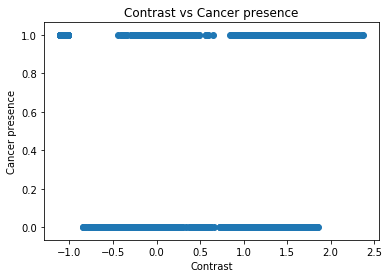

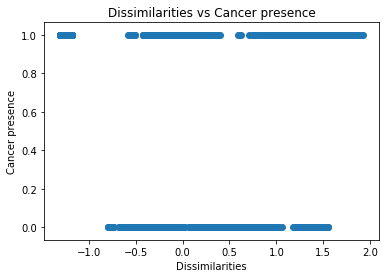

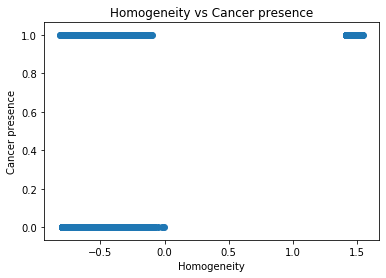

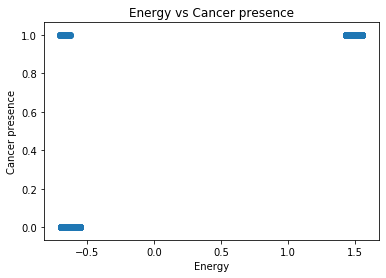

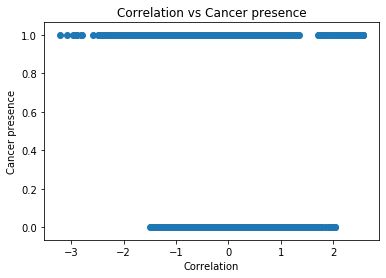

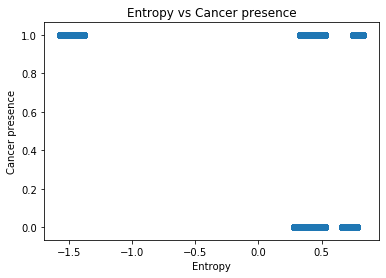

In [18]:
temp = df.columns.values.tolist()
for i in temp:
    x = df[i]
    plt.scatter(x, y)
    plt.xlabel(i)
    plt.ylabel('Cancer presence')
    plt.title('%s vs Cancer presence'%i)
    plt.show()

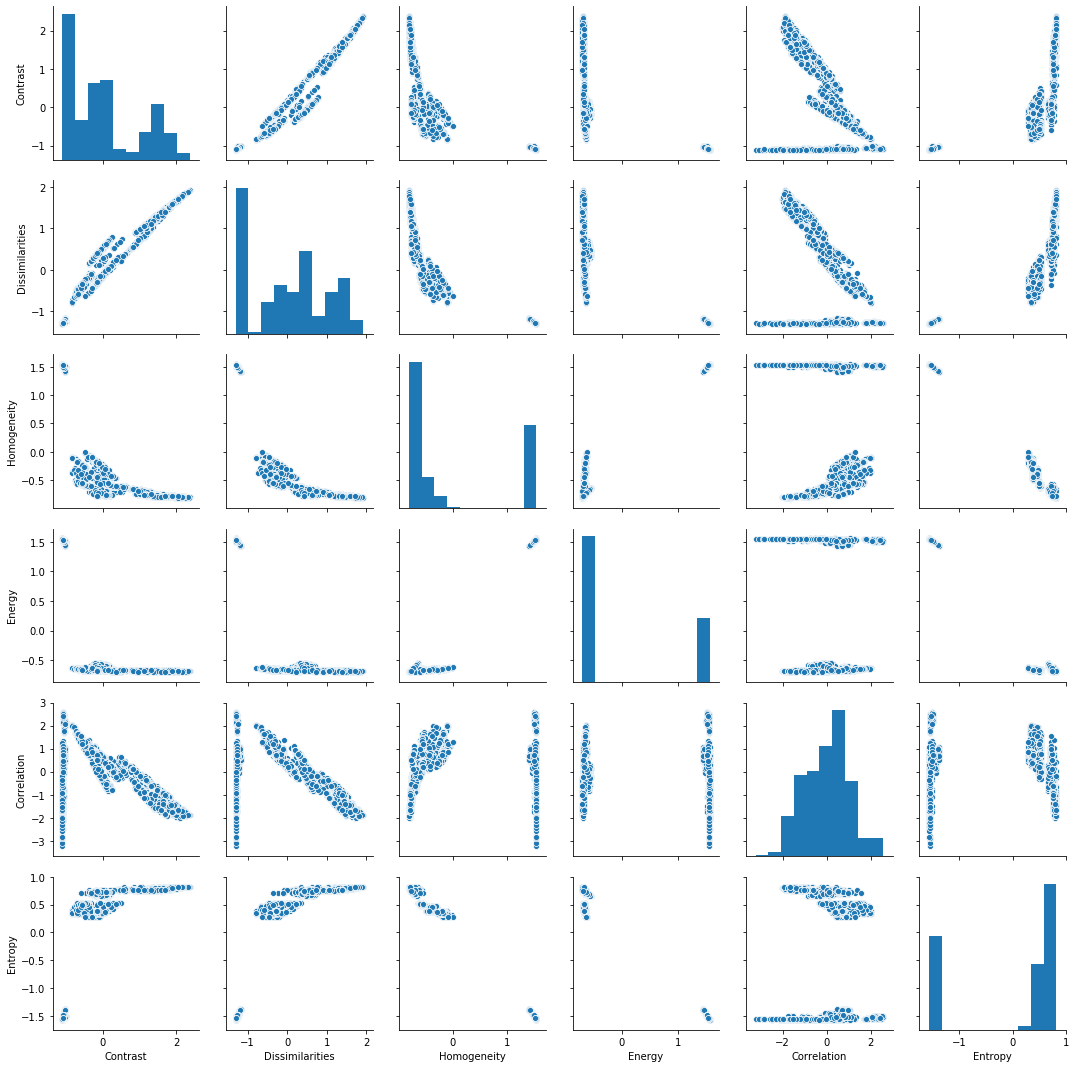

In [19]:
sns.pairplot(df)

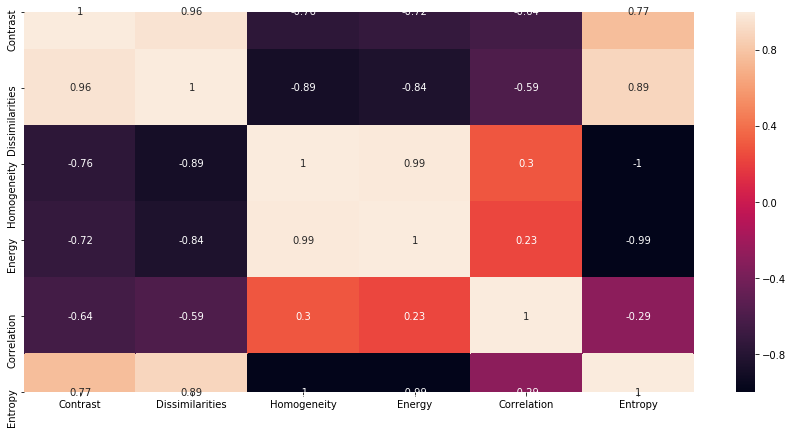

In [20]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), annot = True)

In [21]:
def performance_metrics(y_test, y_pred):
    print('Performance metrics:')
    print(classification_report(y_test, y_pred), '\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred),'\n')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('True positive: ', tp)
    print('True negavtive: ', tn)
    print('False positive: ', fp)
    print('False negative: ', fn)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

# Neural network

In [23]:
classifier = Sequential()

In [24]:
classifier.add(Dense(6, activation = 'relu', 
                     kernel_initializer = 'random_normal', 
                     input_dim = 6))

In [25]:
classifier.add(Dense(6, activation = 'relu',
                    kernel_initializer = 'random_normal'))

In [26]:
classifier.add(Dense(1, activation = 'sigmoid',
                    kernel_initializer = 'random_normal'))

In [27]:
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [28]:
classifier.fit(x_train, y_train, batch_size = 5, epochs = 100)

Train on 3049 samples
Epoch 1/100
3049/3049 [==============================] - 1s 366us/sample - loss: 0.5262 - accuracy: 0.7570
Epoch 2/100
3049/3049 [==============================] - 1s 244us/sample - loss: 0.3352 - accuracy: 0.8563
Epoch 3/100
3049/3049 [==============================] - 1s 246us/sample - loss: 0.3246 - accuracy: 0.8577
Epoch 4/100
3049/3049 [==============================] - 1s 254us/sample - loss: 0.3199 - accuracy: 0.8570
Epoch 5/100
3049/3049 [==============================] - 1s 257us/sample - loss: 0.3131 - accuracy: 0.8550
Epoch 6/100
3049/3049 [==============================] - 1s 263us/sample - loss: 0.3068 - accuracy: 0.8570
Epoch 7/100
3049/3049 [==============================] - 1s 247us/sample - loss: 0.2986 - accuracy: 0.8544
Epoch 8/100
3049/3049 [==============================] - 1s 249us/sample - loss: 0.2887 - accuracy: 0.8534
Epoch 9/100
3049/3049 [==============================] - 1s 253us/sample - loss: 0.2769 - accuracy: 0.8531
Epoch 10/100
30

KeyboardInterrupt: 

In [ ]:
print('Accuracy on training set : ', 
      classifier.evaluate(x_train, y_train)[1])
print()
print('Loss on training set : ', 
      classifier.evaluate(x_train, y_train)[0])

In [ ]:
print('Accuracy on testing set : ', 
      classifier.evaluate(x_test, y_test)[1])
print()
print('Loss on testing set : ', 
      classifier.evaluate(x_test, y_test)[0])

In [ ]:
y_pred = classifier.predict_classes(x_test)
performance_metrics(y_test, y_pred)

### False false class

In [ ]:
print('Accuracy on testing set : ', 
      classifier.evaluate(test_df, y_new_test)[1])
print()
print('Loss on testing set : ', 
      classifier.evaluate(test_df, y_new_test)[0])

In [ ]:
classifier2 = Sequential([
    Dense(6, activation = 'relu', kernel_initializer = 'random_normal', input_dim = 6),
    Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
    Dense(256, activation = 'relu', kernel_initializer = 'random_normal'),
    Dense(1, activation = 'sigmoid',kernel_initializer = 'random_normal')
])

In [ ]:
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier2.summary()

In [ ]:
classifier2.fit(x_train, y_train, epochs = 100)

In [ ]:
classifier3 = Sequential([
    Dense(6, activation = 'relu', kernel_initializer = 'random_normal', input_dim = 6),
    Dense(512, activation = 'relu', kernel_initializer = 'random_normal'),
    Dense(1024, activation = 'relu', kernel_initializer = 'random_normal'),
    Dense(512, activation = 'relu', kernel_initializer = 'random_normal'),
    Dense(1024, activation = 'relu', kernel_initializer = 'random_normal'),
    Dense(512, activation = 'relu', kernel_initializer = 'random_normal'),
    Dense(1024, activation = 'relu', kernel_initializer = 'random_normal'),
    Dense(1, activation = 'sigmoid',kernel_initializer = 'random_normal')
])

In [ ]:
classifier3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier3.fit(x_train, y_train, epochs = 100)

In [ ]:
classifier4 = Sequential([
    Dense(6, activation = 'relu', kernel_initializer = 'random_normal', input_dim = 6),
    Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
    Dense(1, activation = 'sigmoid',kernel_initializer = 'random_normal')
])

classifier4.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier4.summary()

classifier4.fit(x_train, y_train, epochs = 100)

In [ ]:
x = tf.keras.models.load_model('Users/rt/Desktop/College/Cancer Project/Model/model1.h5')